### Building the encoder
We're going to use the MNIST dataset where the size of each image is 28x28. 
We set the shape to (784) rather than (28, 28) because we're going to use only dense layers in the network and thus the input must be in the form of a vector, not a matrix.
We are gonna implement a model containing the following layers:

*   `Dense` layer with 300 neurons
*   `LeakyReLU` layer
*   `Dense` layer with 2 neurons
*   `LeakyReLU` layer

In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models

x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")

encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_1")(x)
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)#to do
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_2")(encoder_dense_layer2) #to do

Build the encoder model

In [ ]:
encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")

We can print a summary of the encoder's architecture:

In [ ]:
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 300)               235500    
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 2)                 602       
_________________________________________________________________
encoder_leakyrelu_2 (LeakyRe (None, 2)                 0         
Total params: 236,102
Trainable params: 236,102
Non-trainable params: 0
_________________________________________________________________


### Building the decoder
Because the input layer of the decoder accepts the output returned from the last layer in the encoder, we have to make sure these 2 layers match in the size. The last layer in the encoder returns a vector of 2 elements and thus the input of the decoder must have 2 neurons. You can easily note that the layers of the decoder are just reflection to those in the encoder.

After the input layer, our decoder model should contain the following layers:
*   `Dense` layer with 300 neurons
*   `LeakyReLU` layer
*   `Dense` layer with 784 neurons
*   `LeakyReLU` layer

In [ ]:
decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")

decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_1")(decoder_input) #to do
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1) #to do
decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1) #to do
decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_dense_layer2) #to do

Build de decoder model

In [ ]:
decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
decoder.summary()

Model: "decoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
decoder_dense_1 (Dense)      (None, 300)               900       
_________________________________________________________________
decoder_leakyrelu_1 (LeakyRe (None, 300)               0         
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 784)               235984    
_________________________________________________________________
decoder_leakyrelu_2 (LeakyRe (None, 784)               0         
Total params: 236,884
Trainable params: 236,884
Non-trainable params: 0
_________________________________________________________________


### Build the complete autoencoder
The tensor named `ae_input` represents the input layer that accepts a vector of length 784. This tensor is fed to the encoder model as an input. The output from the encoder is saved in `ae_encoder_output` which is then fed to the decoder. Finally, the output of the autoencoder is saved in `ae_decoder_output`.

In [ ]:
ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder( ae_encoder_output)

In [ ]:
ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()

Model: "AE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
AE_input (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
encoder_model (Functional)   (None, 2)                 236102    
_________________________________________________________________
decoder_model (Functional)   (None, 784)               236884    
Total params: 472,986
Trainable params: 472,986
Non-trainable params: 0
_________________________________________________________________


### Compile autoencoder model.
We want to use the mean square error as loss function and Adam optimizer with learning rate set to 0.0005. For that we will use the `compile()` method.

In [ ]:
import tensorflow.keras.optimizers  
ae.compile(loss='mse', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0005))

### Load Dataset
We are going to use the MNIST dataset that can be loaded from the datasets Keras API. The dataset is loaded as NumPy arrays representing the training data, test data, train labels, and test labels. Note that we are not interested in using the class labels at all while training the model but they are just used to display the results. \\
Because our model accepts the images as vectors of length 784, we must reshape the the images from the dataset into 1D vectors.

In [ ]:
import tensorflow.keras.datasets
import numpy

(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], numpy.prod(x_train_orig.shape[1:])))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], numpy.prod(x_test_orig.shape[1:])))

11493376/11490434 [==============================] - 0s 0us/step


### Train the autoencoder

In [ ]:
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 5s 21ms/step - loss: 0.0599 - val_loss: 0.0552
Epoch 2/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0546 - val_loss: 0.0540
Epoch 3/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0535 - val_loss: 0.0530
Epoch 4/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0525 - val_loss: 0.0521
Epoch 5/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0513 - val_loss: 0.0506
Epoch 6/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0498 - val_loss: 0.0490
Epoch 7/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0485 - val_loss: 0.0482
Epoch 8/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0476 - val_loss: 0.0475
Epoch 9/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0471 - val_loss: 0.0470
Epoch 10/20
235/235 [==============================] - 5s 20ms/step - loss: 0.0467 - val_lo

### Make predictions
The `predict()` method is used in the next code to return the outputs of both the encoder and decoder models. The `encoded_images` NumPy array holds the reshaped 1D vectors representing all training images obtained from the MNIST dataset. The decoder model accepts the output of the encoder to reconstruct the original images.

In [ ]:
encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)

As we can see below, the variable `encoded_images` contains a compressed representation of each sample. While input images were represented as a 1D vector of length 784, each sample is represented after compression by a 1D vector of length 2.

In [ ]:
encoded_images[1].size

2

After decoding, vectors show a length of 784 again.

In [ ]:
decoded_images[1].size

784

Finally, we need to reshape the output vectors to get an estimation of the initial data

In [ ]:
decoded_images_orig = numpy.reshape(decoded_images,newshape=(decoded_images.shape[0],28,28))

We can display the original and reconstructed images of 5 random samples

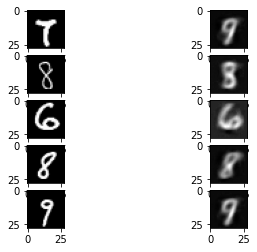

In [ ]:
import matplotlib
num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

In [ ]:
#Cette fonction combine toute les étapes précédentes et elle nous permet de modifier le nombre de neurones de la première couche pour modifier le taux de compression
def autoencoder (nb_neurons,x_train, x_test):
  x = tensorflow.keras.layers.Input(shape=(784), name="encoder_input")
  encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=nb_neurons, name="encoder_dense_1")(x)
  encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)
  encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
  encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_leakyrelu_2")(encoder_dense_layer2)
  encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
  encoder.summary()
  decoder_input = tensorflow.keras.layers.Input(shape=(2), name="decoder_input")
  decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=nb_neurons, name="decoder_dense_1")(decoder_input)
  decoder_activ_layer1 =  tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)
  decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1)
  decoder_output = tensorflow.keras.layers.LeakyReLU(name="decoder_leakyrelu_2")(decoder_dense_layer2)
  decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder_model")
  decoder.summary()
  ae_input = tensorflow.keras.layers.Input(shape=(784), name="AE_input")
  ae_encoder_output = encoder(ae_input)
  ae_decoder_output = decoder(ae_encoder_output)
  ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
  ae.summary()
  ae.compile(loss='mse', optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0005))
  ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
  encoded_images = encoder.predict(x_train)
  decoded_images = decoder.predict(encoded_images)
  encoded_images[1].size
  decoded_images[1].size
  decoded_images_orig = numpy.reshape(decoded_images,newshape=(decoded_images.shape[0],28,28))
  return decoded_images_orig

In [ ]:
from math import log10, sqrt 
import tensorflow.image

#Permet de calculer le PSNR

def PSNR(original, compressed): 
    original = original.astype(numpy.float64)
    compressed = compressed.astype(numpy.float64)
    #print(original)
    mse = numpy.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
 
    return psnr

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 50)                39250     
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 50)                0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 2)                 102       
_________________________________________________________________
encoder_leakyrelu_2 (LeakyRe (None, 2)                 0         
Total params: 39,352
Trainable params: 39,352
Non-trainable params: 0
_________________________________________________________________
Model: "decoder_model"
_________________________________________________________________
Layer (type)              

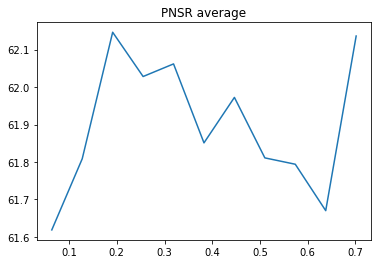

In [ ]:
average_PNSR = [] #Tableau des moyennes du PSNR sur plusieurs images
prob=[] #Tableau de toutes les probabilités
import matplotlib.pyplot as plt
def show_images():
  pnsr = 0
  import matplotlib
  num_images_to_show = 100
  for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    pnsr += PSNR(x_train_orig[rand_ind, :, :], decoded_images_orig[rand_ind, :, :]) #Calcule le PSNR sur l'image originel et decodé
  pnsr = (pnsr/num_images_to_show) #Calcule la moyenne de PSNR
  average_PNSR.append(pnsr) 
x = []

#Autoencode les images, calcule le PSNR et l'entropie
for i in range (50, 600, 50): #i est le nombre de neurones pour varier le taux de compression 
  x.append(i)
  decoded_images_orig = autoencoder(i,x_train, x_test)
  prob.append(prob_entropy(decoded_images_orig))
  show_images()
  print(average_PNSR)
y = average_PNSR

#Affiche la moyenne des PSNR en fonction du taux de compression
new_x = []
for i in range(len(x)):
  new_x.append(x[i]/784)
print(new_x)
plt.plot(new_x, y)
plt.title("PNSR average")
plt.show()

plt.close()

In [ ]:
#Cette fonction permet de calculer les probabilités ainsi que l'entropy
import cv2
def prob_entropy(image):
  prob=[]
  histogram = cv2.calcHist([image],[0],None,[256],[0,255])
  for elt in  histogram:
    proba = elt/784
    if proba ==0:
      temp=0
    else:
      temp=-1*proba*(numpy.log(proba)/numpy.log(2))
    prob.append(temp)
  
  sum_prob=numpy.sum(prob)
  return sum_prob[0]

In [ ]:
#We know that no feature has 0 image
from math import log2
entropy = 0
 # in bits
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0
nbFeatureList = numpy.histogram(y_train)[0]  # Number of images for each value represented
for nbFeature in nbFeatureList:
  entropy -= nbFeature/60000 * log2(nbFeature/60000) # p_i = nbFeature_i /60000 
print(entropy)

3.3198709267551876
